# Visualisation des Données

### Installation

In [1]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install scipy
#%pip install statsmodels

### Importation


In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import plotly.express as px
import matplotlib

### Chargement des données

In [3]:
df = pd.read_csv("df_assurance_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Visualisation des variables

- Visualisation de la distibution du BMI

In [4]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

fig = px.histogram(df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='Distribustion de BMI')

fig.update_layout(bargap=0.1)
fig.show()

- Visualisation de la distibution des charges et des smokers

In [5]:
fig = px.histogram(df,
                    x='charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green', 'orange'],
                    title="Distribution des charges")

fig.update_layout(bargap=0.1)
fig.show() 

- Visualisation des charges en fonction du sex

In [6]:
fig = px.histogram(df,
                    x="charges",
                    marginal="box",
                    color="sex",
                    color_discrete_sequence=["blue", "purple"],
                    title="Les charges en fonction du sex")

fig.update_layout(bargap=0.1)
fig.show() 

- La moyenne des charges est la même pour les deux sexes. Les charges maximales pour les hommes est nettement supérieures à celles des femmes.
- Les outliers sont bien présents.

- Visualisation des charges dans les régions

In [7]:
fig = px.histogram(df,
                    x="charges",
                    marginal="box",
                    color="region",
                    color_discrete_sequence=["grey", "orange", "green","violet"],
                    title="Répartition des charges dans les régions")

fig.update_layout(bargap=0.1)
fig.show() 

- Visualisation des smokers

In [8]:
px.histogram(df, x="smoker", color="sex", title="Smoker")

In [9]:
px.histogram(df, x="region", color="smoker", title="Region")

In [10]:
px.histogram(df, x="smoker", color="children", title="Smoker Vs Children")

- Relations Age et Charges

In [11]:
fig = px.scatter(df,
                x="age",
                y="charges",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs Charges")

fig.update_traces(marker_size=5)
fig.show()                

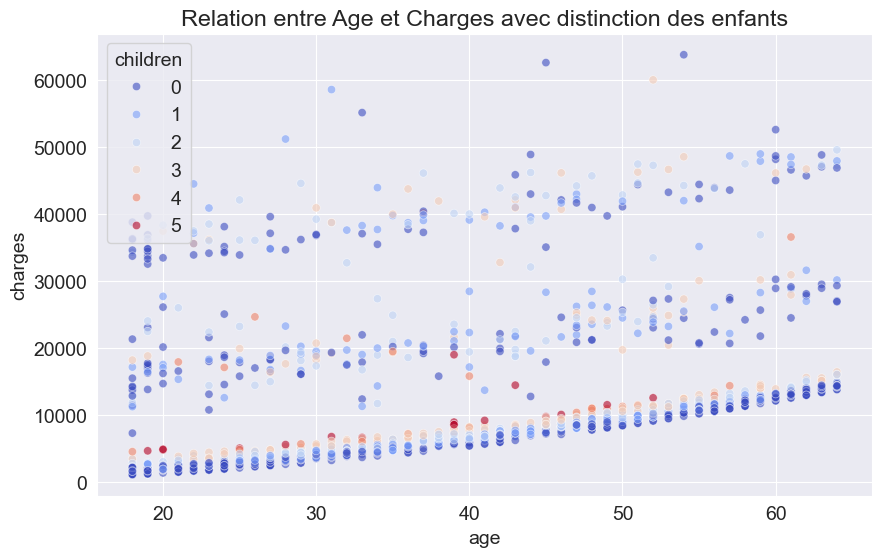

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='children', palette='coolwarm', alpha= 0.6)
plt.title('Relation entre Age et Charges avec distinction des enfants')
plt.show()

- Distribution BMI et Charges

In [13]:
fig = px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                hover_data=['sex'],
                opacity=0.8,
                width=800,
                height=500,
                title="BMI Vs Charges")

fig.update_traces(marker_size=5)
fig.show()

In [14]:
fig = px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                hover_data=['region'],
                opacity=0.9,
                width=800,
                height=500,
                title= "BMI Vs charges")

fig.update_traces(marker_size=5)
fig.show()  

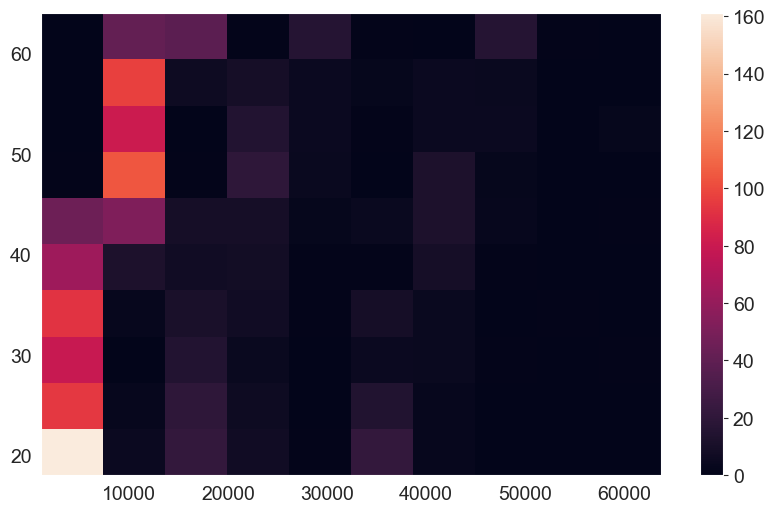

In [15]:
plt.figure
plt.hist2d(df.iloc[:,6], df.iloc[:,0])
plt.colorbar()
plt.show()

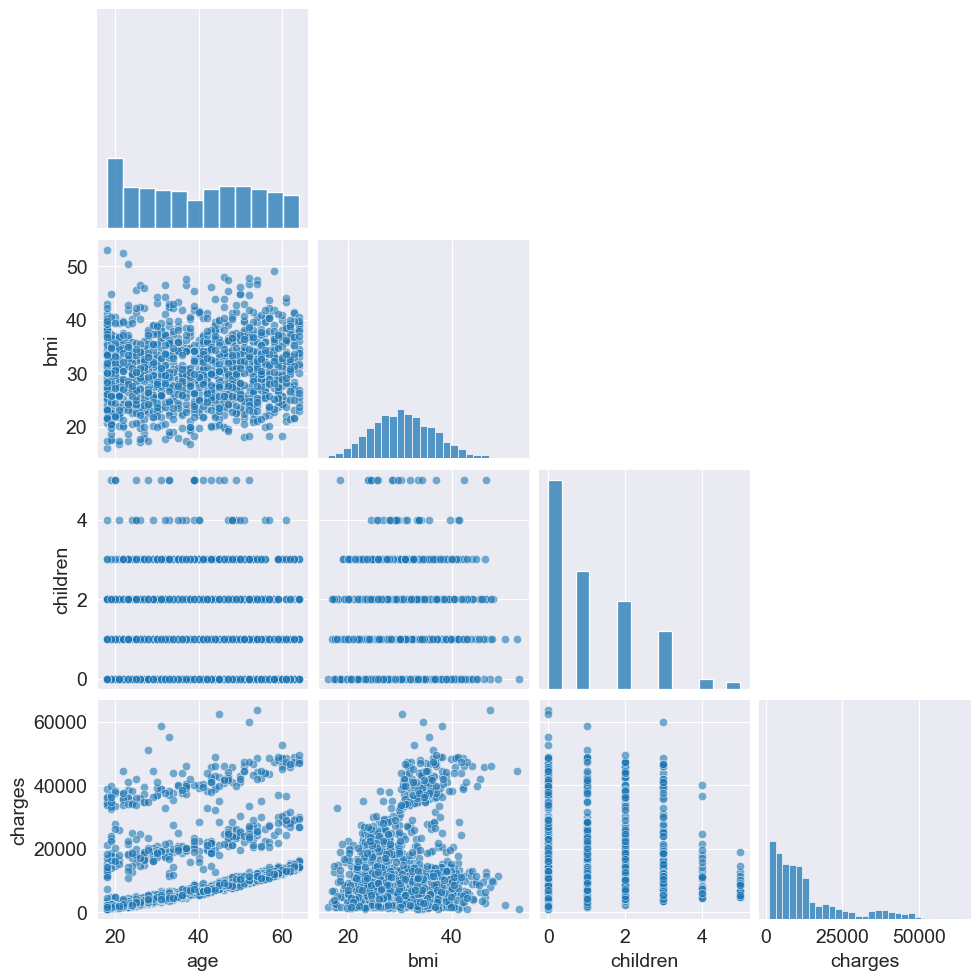

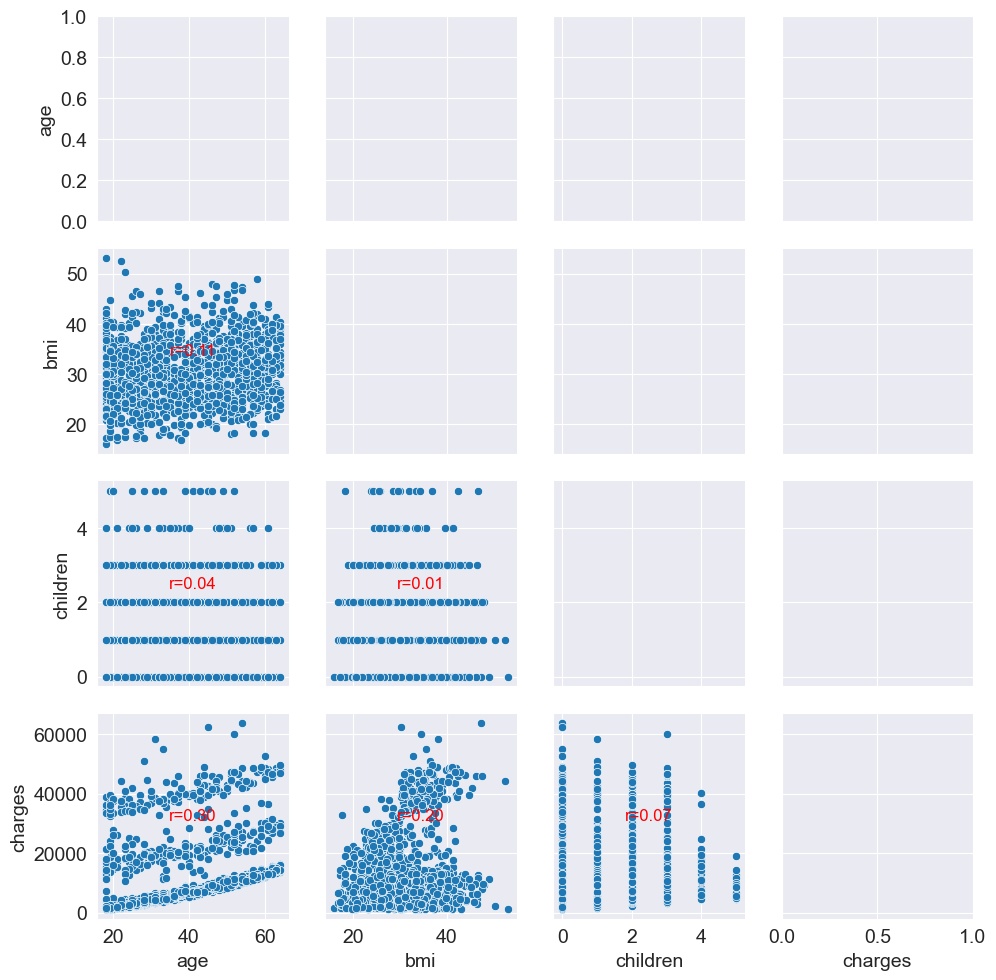

In [16]:
def annotate_corr(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'r={r:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=12, color='red')
    
#sns.pairplot(df,  hue='charges', palette='coolwarm')
#sns.pairplot(df, palette='coolwarm')
#df2 = df.tail()
#print()
sns.pairplot(df, corner=True, plot_kws={'alpha': 0.6})
g = sns.PairGrid(df)
g.map_lower(sns.scatterplot)
g.map_lower(annotate_corr)
plt.show()

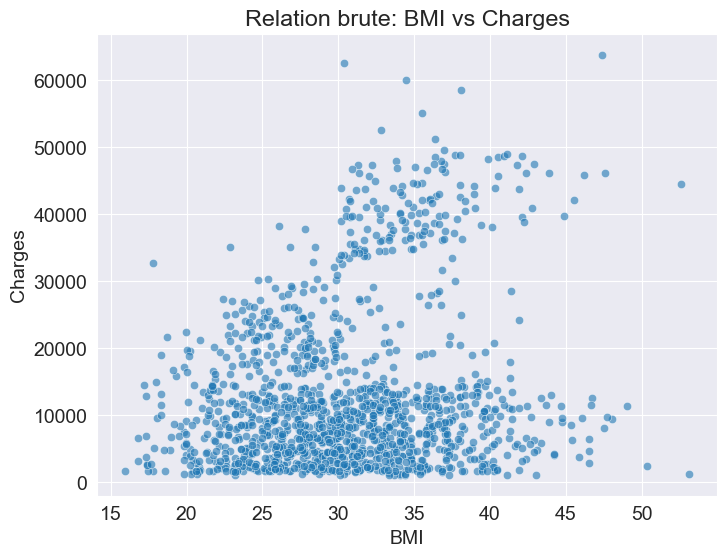

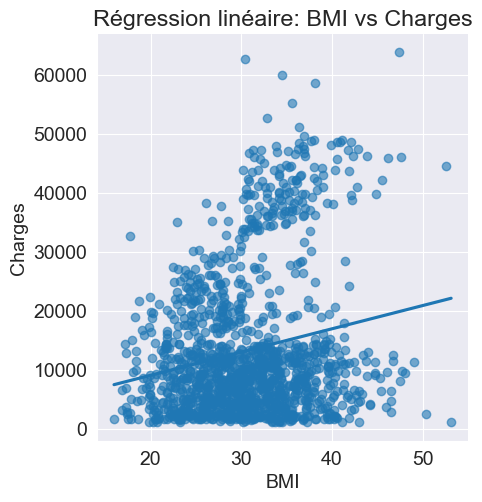

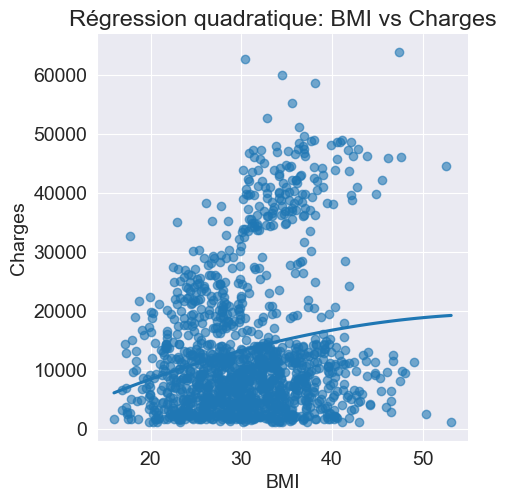

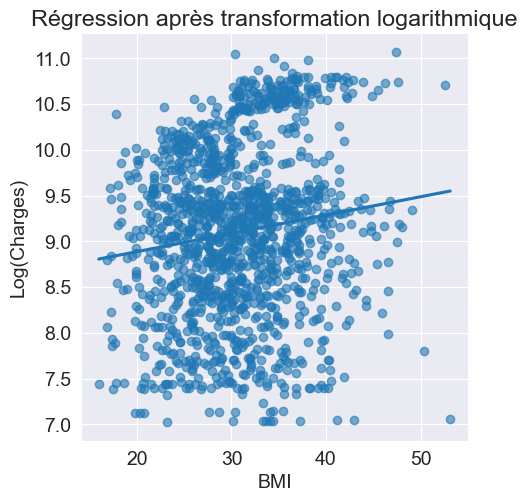

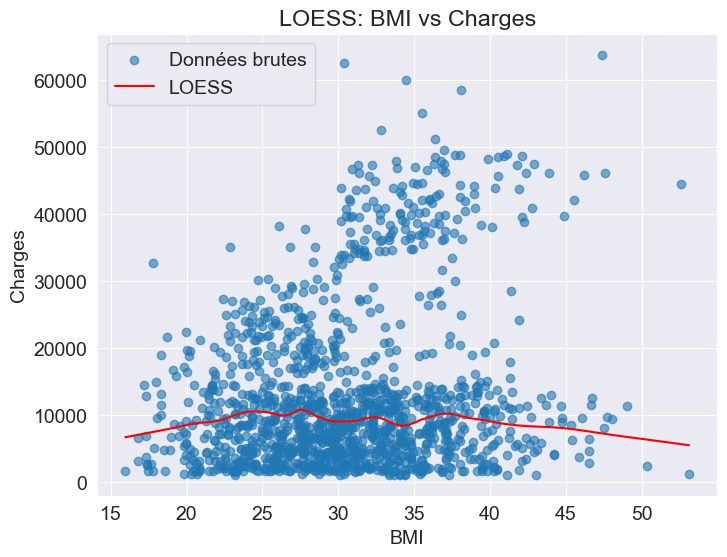

In [17]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm')
#sns.lineplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm')
#plt.title('Relation entre Age et Charges avec distinction de Smoker')
#plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges', alpha=0.6)
plt.title("Relation brute: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

sns.lmplot(data=df, x='bmi', y='charges', ci=None, scatter_kws={'alpha':0.6})
plt.title("Régression linéaire: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

sns.lmplot(data=df, x='bmi', y='charges', order=2, ci=None, scatter_kws={'alpha':0.6})
plt.title("Régression quadratique: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

import numpy as np

# Transformation logarithmique
df['log_charges'] = np.log(df['charges'])

sns.lmplot(data=df, x='bmi', y='log_charges', ci=None, scatter_kws={'alpha':0.6})
plt.title("Régression après transformation logarithmique")
plt.xlabel("BMI")
plt.ylabel("Log(Charges)")
plt.show()

from statsmodels.nonparametric.smoothers_lowess import lowess

# Lissage LOESS
lowess_smoothed = lowess(df['charges'], df['bmi'], frac=0.2)

plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.6, label="Données brutes")
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', label="LOESS")
plt.title("LOESS: BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

In [18]:
def view_feature(data):
    sns.boxplot(data=data)
    sns.violinplot(data=data)
    plt.show()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print("Outliers détectés :", outliers)

In [19]:
def view_charge_feature(data):
    print("charges")
    sns.boxplot(x=data)
    sns.violinplot(x=data)
    plt.show()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(lower_bound)
    print(upper_bound)
    # Filtrer les outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(outliers.describe())
    print("Outliers détectés :", outliers)

<function matplotlib.pyplot.show(close=None, block=None)>

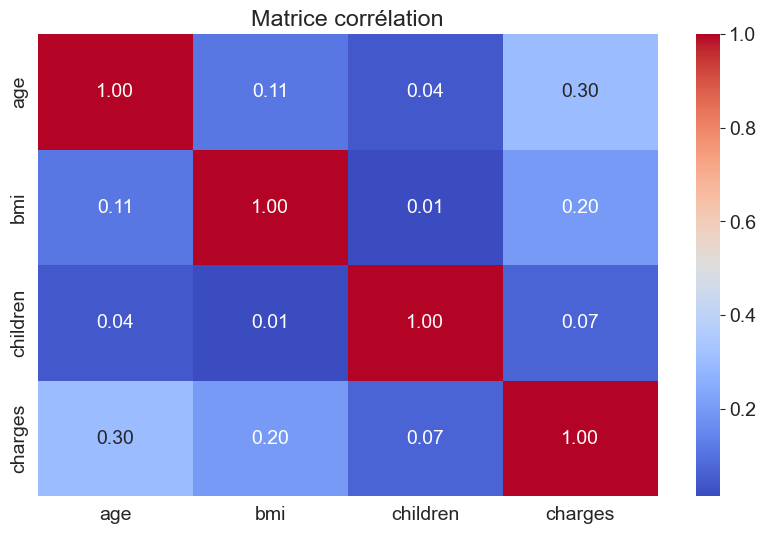

In [20]:
correlation = []
df1 = df[["age","bmi","children","charges"]]
df2 = df[["sex","smoker","region","charges"]]
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice corrélation")
plt.show
#def calcul_correltion(data):
	#for i in range(0,data.shape[1]-1):
	#	corre = np.mean(data[:,i])
	#	std = np.std(data[:,i])
	#	mu_list.append(mu)
	#	std_list.append(std)
	#	data[:,i] = ((data[:,i] - mu)/std)

Z-scores :       age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1332   50    male  30.970         3     no  northwest  10600.54830   
1333   18  female  31.920         0     no  northeast   2205.98080   
1334   18  female  36.850         0     no  southeast   1629.83350   
1335   21  female  25.800         0     no  southwest   2007.94500   
1336   61  female  29.070         0    yes  northwest  29141.36030   

      log_charges   Z-Score  
0        9.734176 -0.453160  
1        7.453302  0.509422  
2        8.400538  0.383155  
3        9.998092 -1.305052 

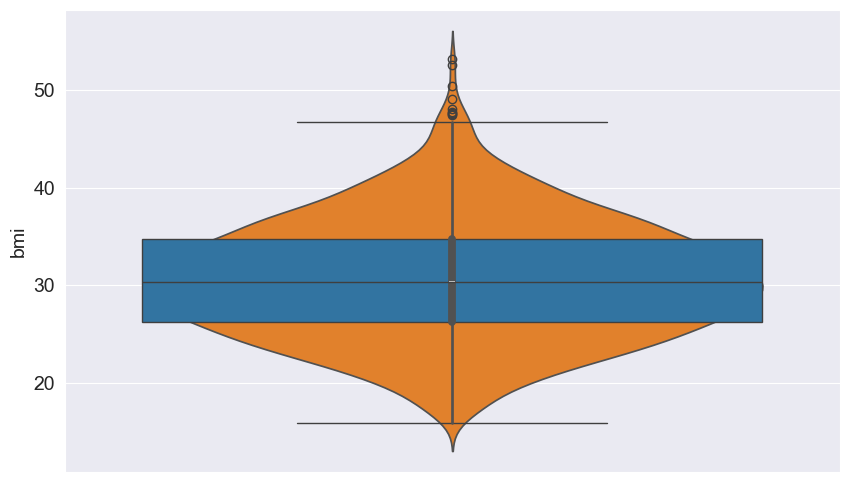

Outliers détectés : 116     49.06
286     48.07
401     47.52
543     47.41
846     50.38
859     47.60
1046    52.58
1087    47.74
1316    53.13
Name: bmi, dtype: float64


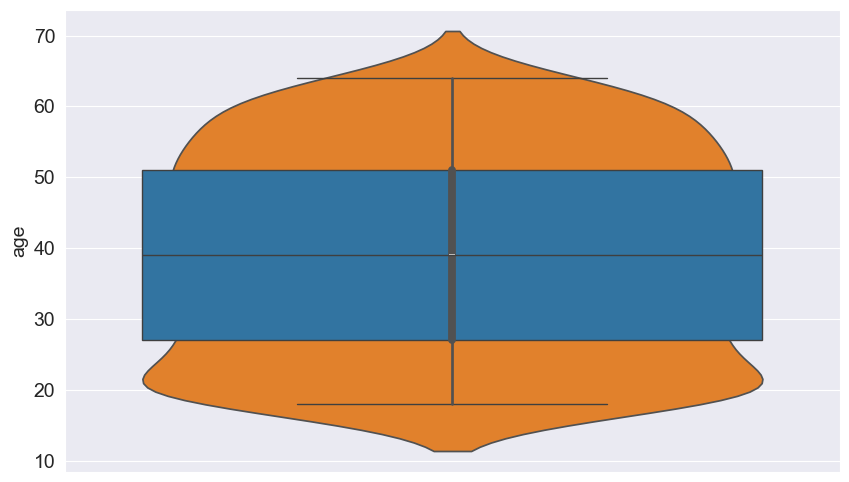

Outliers détectés : Series([], Name: age, dtype: int64)


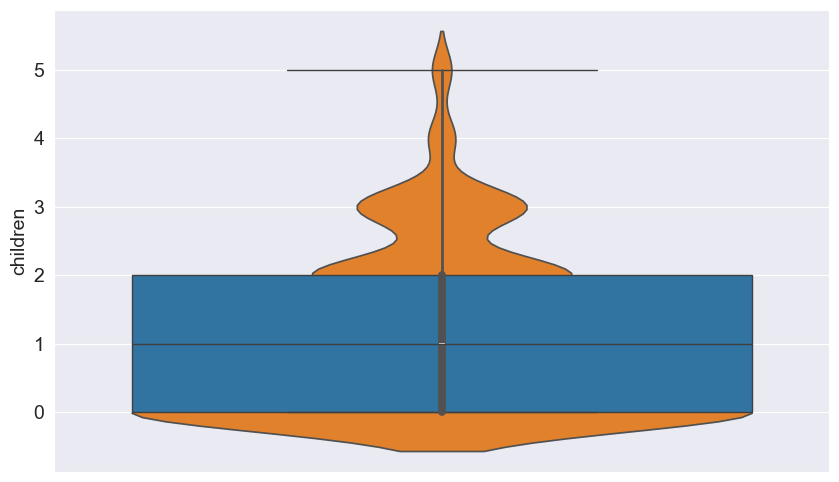

Outliers détectés : Series([], Name: children, dtype: int64)
charges


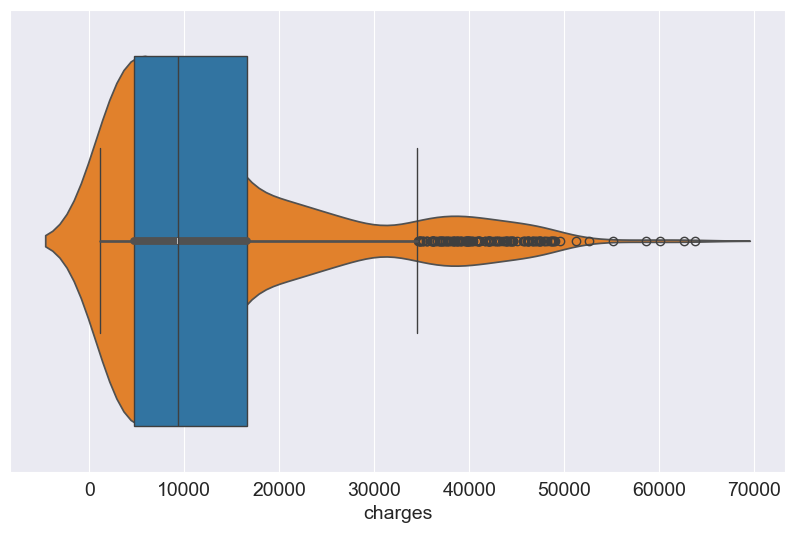

-13120.716174999998
34524.777625
count      139.000000
mean     42103.947206
std       5582.168107
min      34617.840650
25%      37786.149950
50%      40974.164900
75%      45786.706425
max      63770.428010
Name: charges, dtype: float64
Outliers détectés : 14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1299    62592.87309
1300    46718.16325
1302    37829.72420
1312    36397.57600
1322    43896.37630
Name: charges, Length: 139, dtype: float64


In [21]:
from scipy.stats import zscore
# Calcul du Z-score
df['Z-Score'] = zscore(df['bmi'])

# Détection des outliers
outliers_zscore = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]

# Affichage des résultats
print("Z-scores :", df)
print("Valeurs extrêmes (Z-score) :", outliers_zscore)

view_feature(df['bmi'])
#view_feature(df['Z-Score'])
view_feature(df['age'])
view_feature(df['children'])
view_charge_feature(df['charges'])



#sns.boxplot(x=df['bmi'])
#plt.title("Détection des outliers avec un Boxplot")
#plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1337 non-null   object 
 1   smoker   1337 non-null   object 
 2   region   1337 non-null   object 
 3   charges  1337 non-null   float64
dtypes: float64(1), object(3)
memory usage: 41.9+ KB


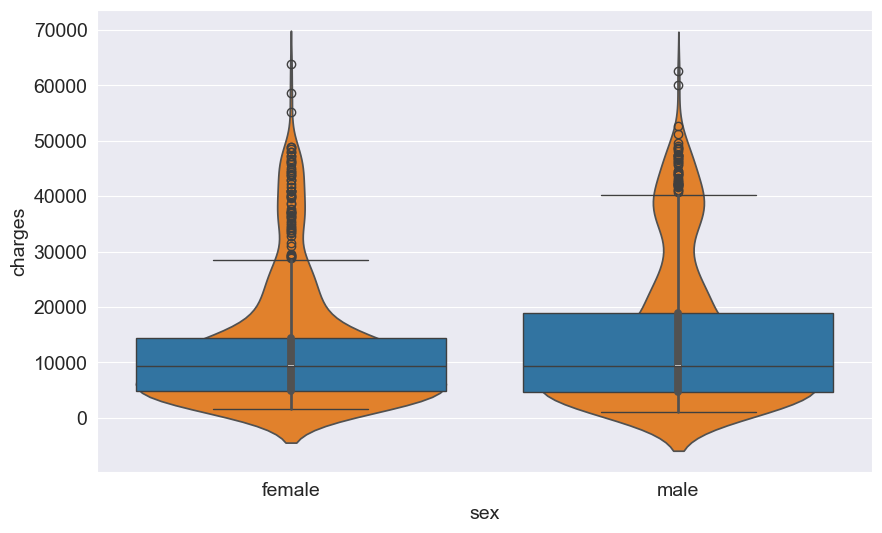

Test ANOVA - F-statistique : 4.51, p-value : 0.034
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower     upper   reject
-------------------------------------------------------
female   male  1405.42 0.0338 107.6025 2703.2375   True
-------------------------------------------------------


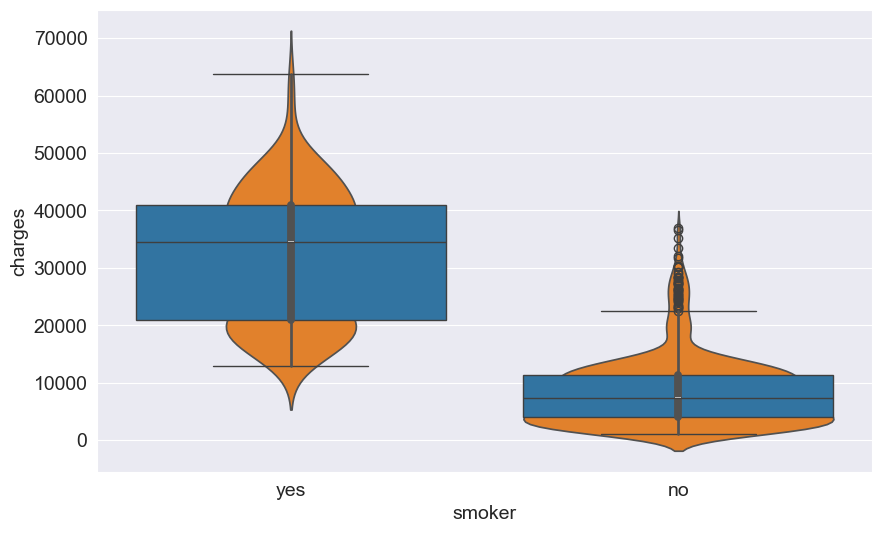

Test ANOVA - F-statistique : 2175.74, p-value : 0.000


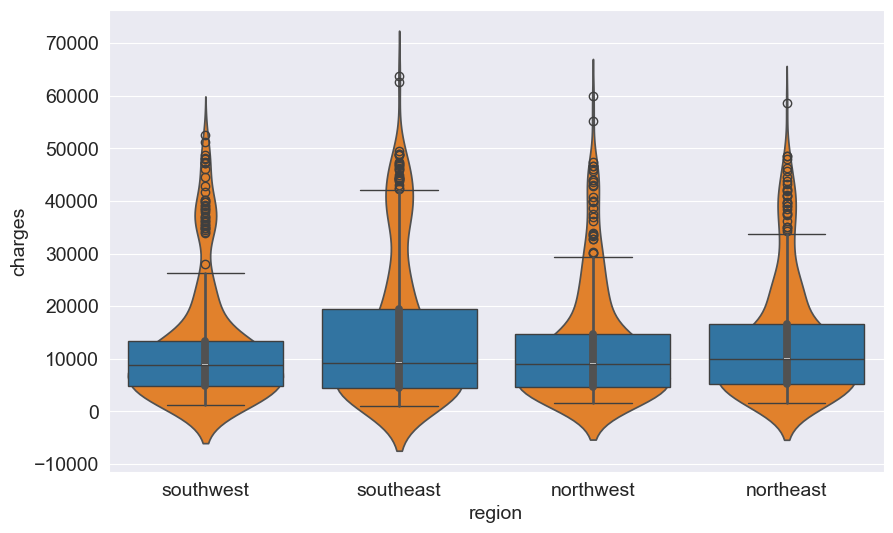

Test ANOVA - F-statistique : 2.93, p-value : 0.033


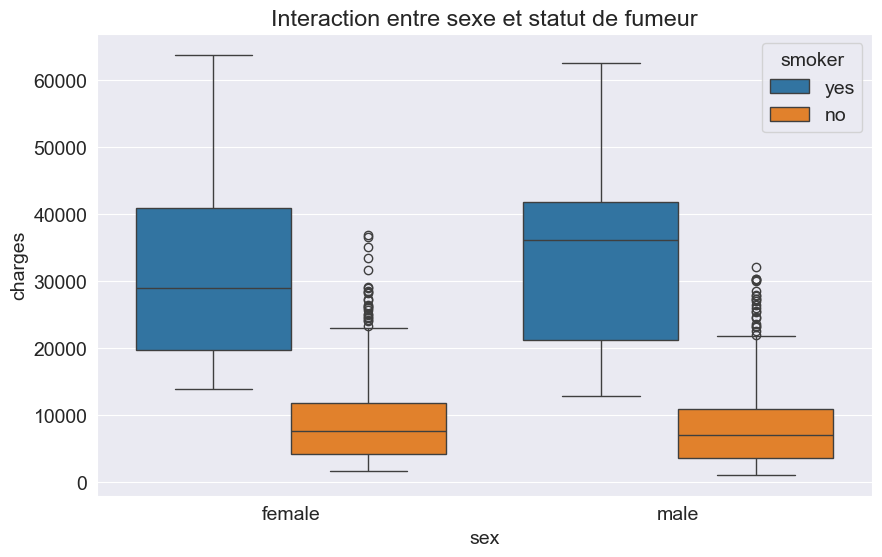

                        sum_sq      df            F         PR(>F)
C(sex)            1.001692e+06     1.0     0.018039   8.931771e-01
C(smoker)         1.207716e+11     1.0  2174.965023  2.306818e-282
C(sex):C(smoker)  4.882006e+08     1.0     8.791961   3.079412e-03
Residual          7.401890e+10  1333.0          NaN            NaN


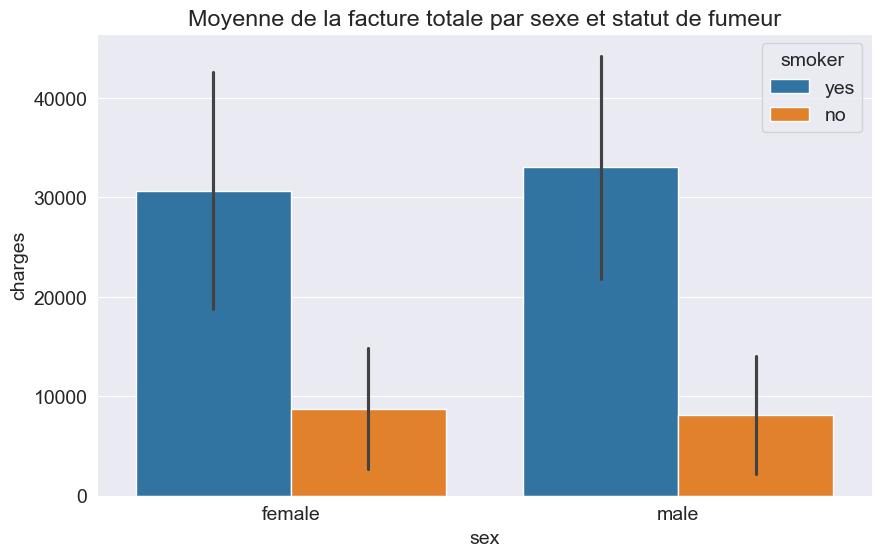

In [22]:

df2.info()
sns.boxplot(x="sex", y="charges", data=df2)
sns.violinplot(x="sex", y="charges",data=df2)
plt.show()

anova_result = stats.f_oneway(df2[df2['sex'] == 'female']['charges'],
                              df2[df2['sex'] == 'male']['charges'])

print(f"Test ANOVA - F-statistique : {anova_result.statistic:.2f}, p-value : {anova_result.pvalue:.3f}")

tukey = pairwise_tukeyhsd(endog=df2['charges'], groups=df2['sex'], alpha=0.05)
print(tukey)


sns.boxplot(x="smoker", y="charges", data=df2)
sns.violinplot(x="smoker", y="charges",data=df2)
plt.show()


anova_result2 = stats.f_oneway(df2[df2['smoker'] == 'no']['charges'],
                              df2[df2['smoker'] == 'yes']['charges'])

print(f"Test ANOVA - F-statistique : {anova_result2.statistic:.2f}, p-value : {anova_result2.pvalue:.3f}")

sns.boxplot(x="region", y="charges", data=df2)
sns.violinplot(x="region", y="charges",data=df2)
plt.show()

anova_result3 = stats.f_oneway(df2[df2['region'] == 'southwest']['charges'],
                              df2[df2['region'] == 'southeast']['charges'],
                              df2[df2['region'] == 'northwest']['charges'],
                              df2[df2['region'] == 'northeast']['charges']
                              )

print(f"Test ANOVA - F-statistique : {anova_result3.statistic:.2f}, p-value : {anova_result3.pvalue:.3f}")


sns.boxplot(x='sex', y='charges', hue='smoker', data=df2)
plt.title("Interaction entre sexe et statut de fumeur")
plt.show()

model = ols('charges ~ C(sex) + C(smoker) + C(sex):C(smoker)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

sns.barplot(x='sex', y='charges', hue='smoker', data=df2, errorbar='sd')
plt.title("Moyenne de la facture totale par sexe et statut de fumeur")
plt.show()